## **1. Análisis Clustering vs Rendimiento**

### Jugadores NBA

## **2. Análisis exploratiorio de los datos (EDA)**

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow import keras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('nba_data.csv')

In [ ]:

print("Primeras filas del dataset:")
print(df.head())


Primeras filas del dataset:
           Player Team      Salary    Year   Age Pos     G    GS      MP  \
0   Stephen Curry  GSW  34682550.0  2017.0  28.0  PG  79.0  79.0  2638.0   
1    LeBron James  CLE  33285709.0  2017.0  32.0  SF  74.0  74.0  2794.0   
2    Paul Millsap  DEN  31269231.0  2017.0  31.0  PF  69.0  67.0  2343.0   
3  Gordon Hayward  BOS  29727900.0  2017.0  26.0  SF  73.0  73.0  2516.0   
4   Blake Griffin  DET  29512900.0  2017.0  27.0  PF  61.0  61.0  2076.0   

      3P    3PA     2P     2PA    ORB    DRB    AST    STL   BLK     PF  \
0  324.0  789.0  351.0   654.0   61.0  292.0  523.0  143.0  17.0  183.0   
1  124.0  342.0  612.0  1002.0   97.0  543.0  646.0   92.0  44.0  134.0   
2   75.0  241.0  355.0   731.0  111.0  422.0  252.0   90.0  62.0  186.0   
3  149.0  374.0  396.0   782.0   49.0  344.0  252.0   73.0  20.0  117.0   
4   38.0  113.0  441.0   858.0  111.0  385.0  300.0   58.0  23.0  157.0   

      PTS  
0  1999.0  
1  1954.0  
2  1246.0  
3  1601.0  
4  1

In [ ]:
print("\nInformación general del dataset:")
df.info()



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 682
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  683 non-null    object 
 1   Team    683 non-null    object 
 2   Salary  683 non-null    float64
 3   Year    552 non-null    float64
 4   Age     552 non-null    float64
 5   Pos     552 non-null    object 
 6   G       552 non-null    float64
 7   GS      552 non-null    float64
 8   MP      552 non-null    float64
 9   3P      552 non-null    float64
 10  3PA     552 non-null    float64
 11  2P      552 non-null    float64
 12  2PA     552 non-null    float64
 13  ORB     552 non-null    float64
 14  DRB     552 non-null    float64
 15  AST     552 non-null    float64
 16  STL     552 non-null    float64
 17  BLK     552 non-null    float64
 18  PF      552 non-null    float64
 19  PTS     552 non-null    float64
dtypes: float64(17), object(3)
memory usage: 112.1+ 

In [ ]:
# 1. Manejo de Valores Faltantes
print("\nConteo de valores faltantes por columna:")
print(df.isnull().sum())



Conteo de valores faltantes por columna:
Player      0
Team        0
Salary      0
Year      131
Age       131
Pos       131
G         131
GS        131
MP        131
3P        131
3PA       131
2P        131
2PA       131
ORB       131
DRB       131
AST       131
STL       131
BLK       131
PF        131
PTS       131
dtype: int64


In [ ]:
# Eliminar las filas que contienen al menos un valor faltante
df_cleaned = df.dropna()

# Verificar el nuevo tamaño del DataFrame y los valores no nulos
print("Tamaño del DataFrame original:", df.shape)
print("Tamaño del DataFrame después de eliminar valores faltantes:", df_cleaned.shape)
print("\nConteo de valores no nulos en el DataFrame limpio:")
print(df_cleaned.info())

# Si quieres reemplazar el DataFrame original con el limpio
# Resetear el índice
df = df_cleaned.reset_index(drop=True)

Tamaño del DataFrame original: (683, 20)
Tamaño del DataFrame después de eliminar valores faltantes: (552, 20)

Conteo de valores no nulos en el DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
Index: 552 entries, 0 to 682
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  552 non-null    object 
 1   Team    552 non-null    object 
 2   Salary  552 non-null    float64
 3   Year    552 non-null    float64
 4   Age     552 non-null    float64
 5   Pos     552 non-null    object 
 6   G       552 non-null    float64
 7   GS      552 non-null    float64
 8   MP      552 non-null    float64
 9   3P      552 non-null    float64
 10  3PA     552 non-null    float64
 11  2P      552 non-null    float64
 12  2PA     552 non-null    float64
 13  ORB     552 non-null    float64
 14  DRB     552 non-null    float64
 15  AST     552 non-null    float64
 16  STL     552 non-null    float64
 17  BLK     552 non-null    float

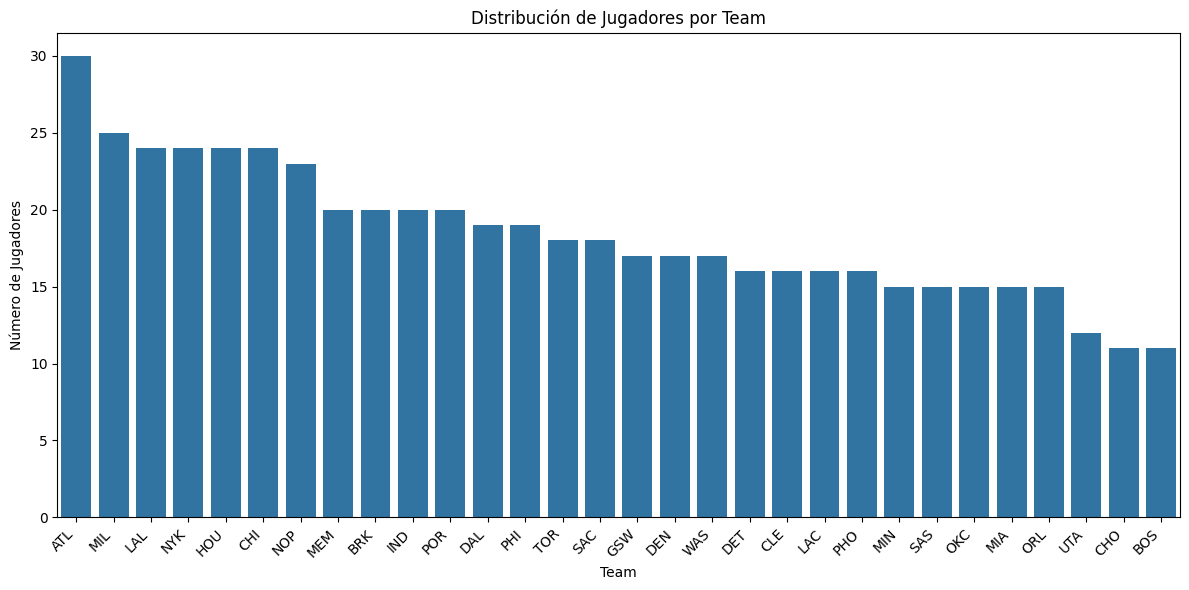

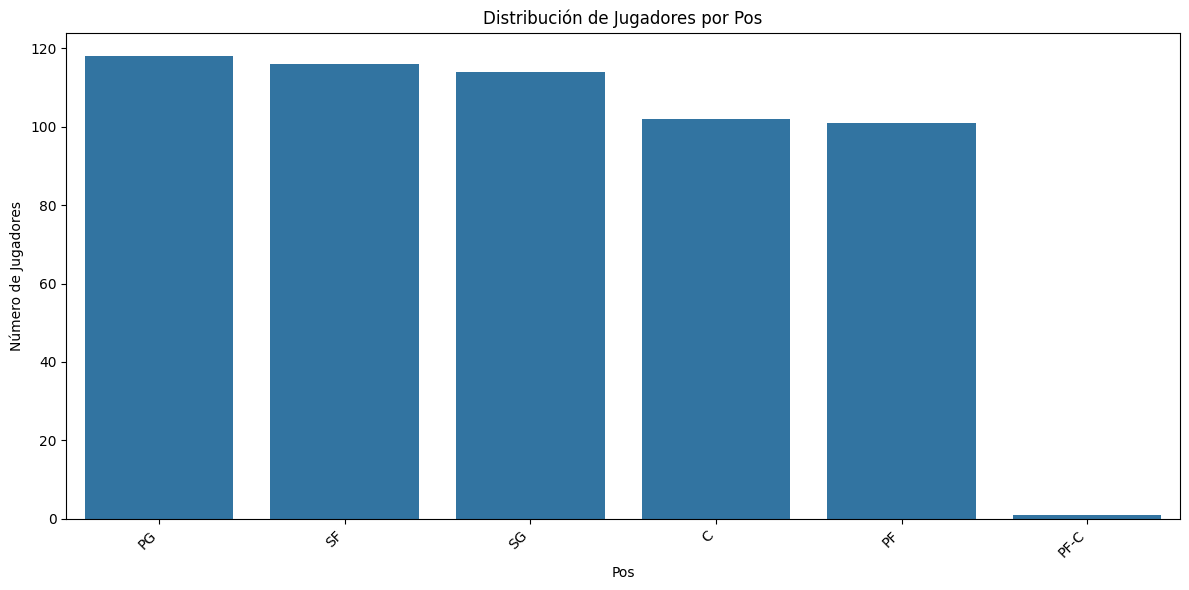


Número de Equipos Únicos: 30

Número de Posiciones Únicas: 6

Distribución de Jugadores por Equipo:
 Team
ATL    30
MIL    25
LAL    24
NYK    24
HOU    24
CHI    24
NOP    23
MEM    20
BRK    20
IND    20
POR    20
DAL    19
PHI    19
TOR    18
SAC    18
GSW    17
DEN    17
WAS    17
DET    16
CLE    16
LAC    16
PHO    16
MIN    15
SAS    15
OKC    15
MIA    15
ORL    15
UTA    12
CHO    11
BOS    11
Name: count, dtype: int64

Distribución de Jugadores por Posición:
 Pos
PG      118
SF      116
SG      114
C       102
PF      101
PF-C      1
Name: count, dtype: int64


In [ ]:
# 2. Análisis de Variables Categóricas ('Player', 'Team', 'Pos')
categorical_cols = ['Team', 'Pos']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribución de Jugadores por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Jugadores')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("\nNúmero de Equipos Únicos:", df['Team'].nunique())
print("\nNúmero de Posiciones Únicas:", df['Pos'].nunique())
print("\nDistribución de Jugadores por Equipo:\n", df['Team'].value_counts())
print("\nDistribución de Jugadores por Posición:\n", df['Pos'].value_counts())


#### PG: Point Guard (Base). El principal manejador del balón y organizador del ataque del equipo. Suelen ser buenos pasadores y tener una alta visión de juego.
#### SG: Shooting Guard (Escolta). Generalmente un buen tirador, especialmente desde la media y larga distancia. También pueden ser capaces de crear sus propios tiros y penetrar a canasta.
#### SF: Small Forward (Alero). Un jugador versátil que puede anotar, rebotear y defender. A menudo son una mezcla de las habilidades de un escolta y un ala-pívot.
#### PF: Power Forward (Ala-Pívot). Un jugador fuerte y físico que juega cerca de la canasta. Suelen ser buenos reboteadores y anotadores en la pintura. También pueden tener habilidades de tiro de media distancia.
#### C: Center (Pívot). El jugador más alto del equipo, que juega principalmente cerca de la canasta. Son importantes para rebotear, defender el aro y anotar en la pintura.

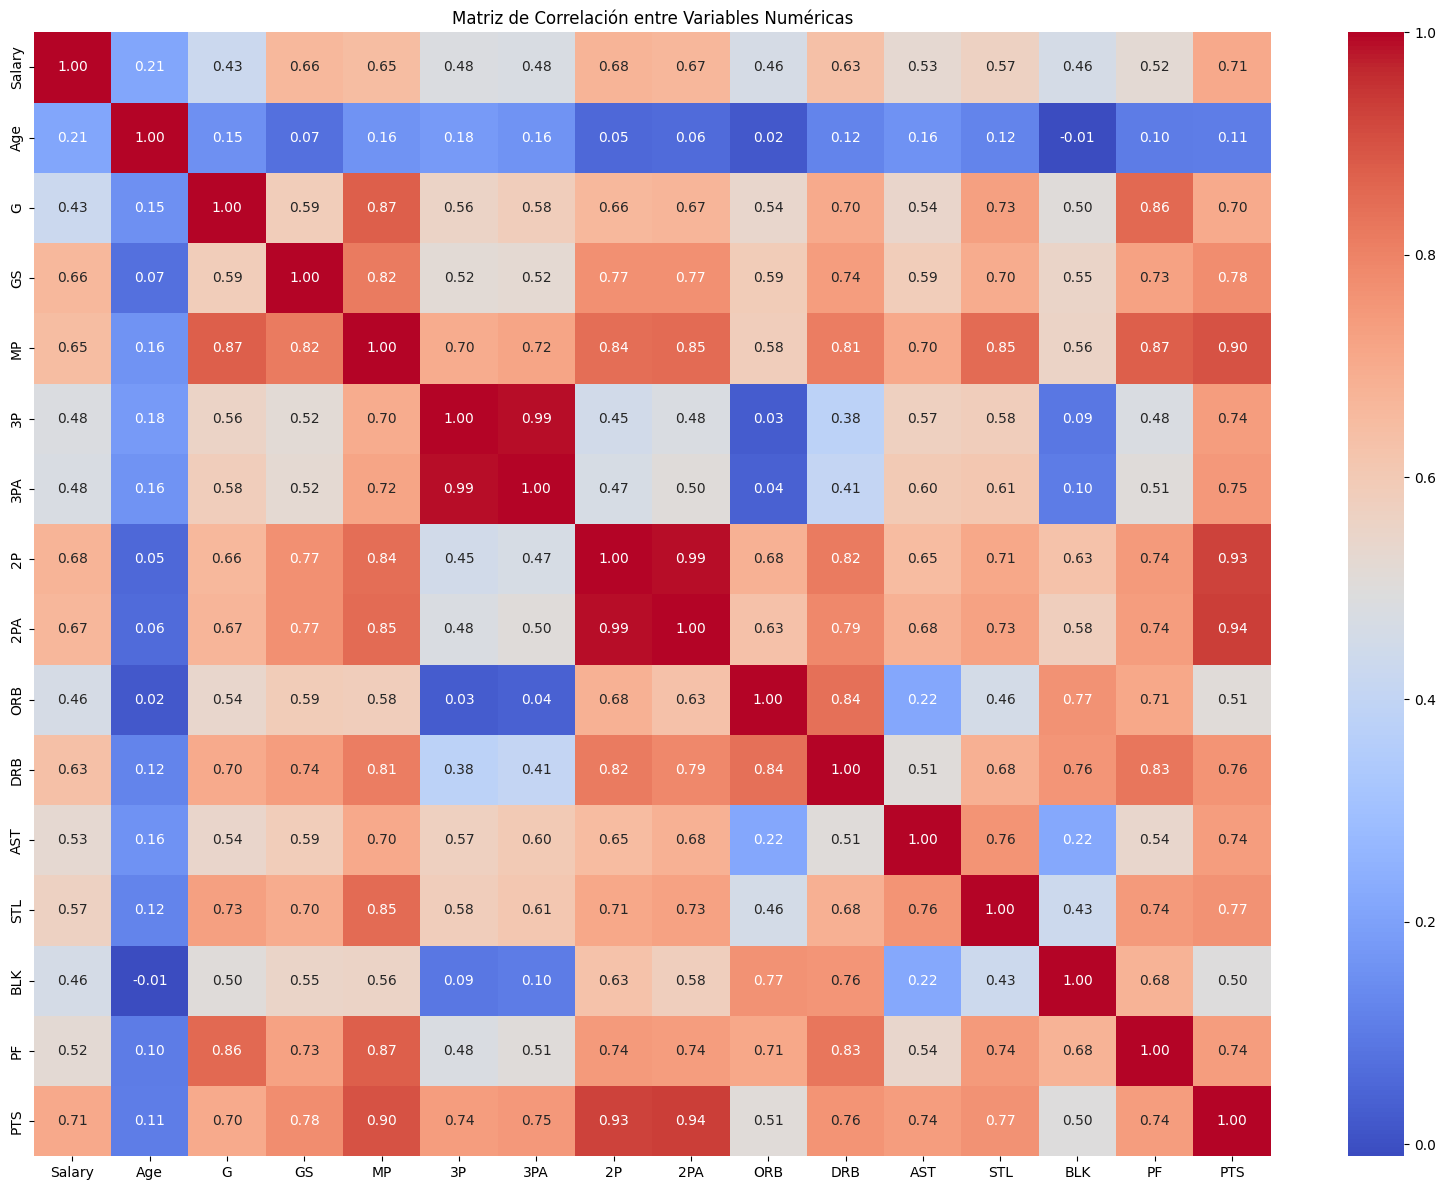


Correlaciones con el Salario:
 Salary    1.000000
PTS       0.707739
2P        0.675053
2PA       0.665769
GS        0.664205
MP        0.645243
DRB       0.633610
STL       0.567893
AST       0.529328
PF        0.518306
3P        0.484371
3PA       0.477993
ORB       0.463697
BLK       0.459939
G         0.428048
Age       0.212378
Name: Salary, dtype: float64


In [ ]:
# 3. Análisis de Correlaciones
numerical_cols_for_corr = ['Salary', 'Age', 'G', 'GS', 'MP', '3P', '3PA', '2P', '2PA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'PF', 'PTS']
correlation_matrix = df[numerical_cols_for_corr].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

# Identificación de las correlaciones más fuertes con el salario
salary_corr = correlation_matrix['Salary'].sort_values(ascending=False)
print("\nCorrelaciones con el Salario:\n", salary_corr)

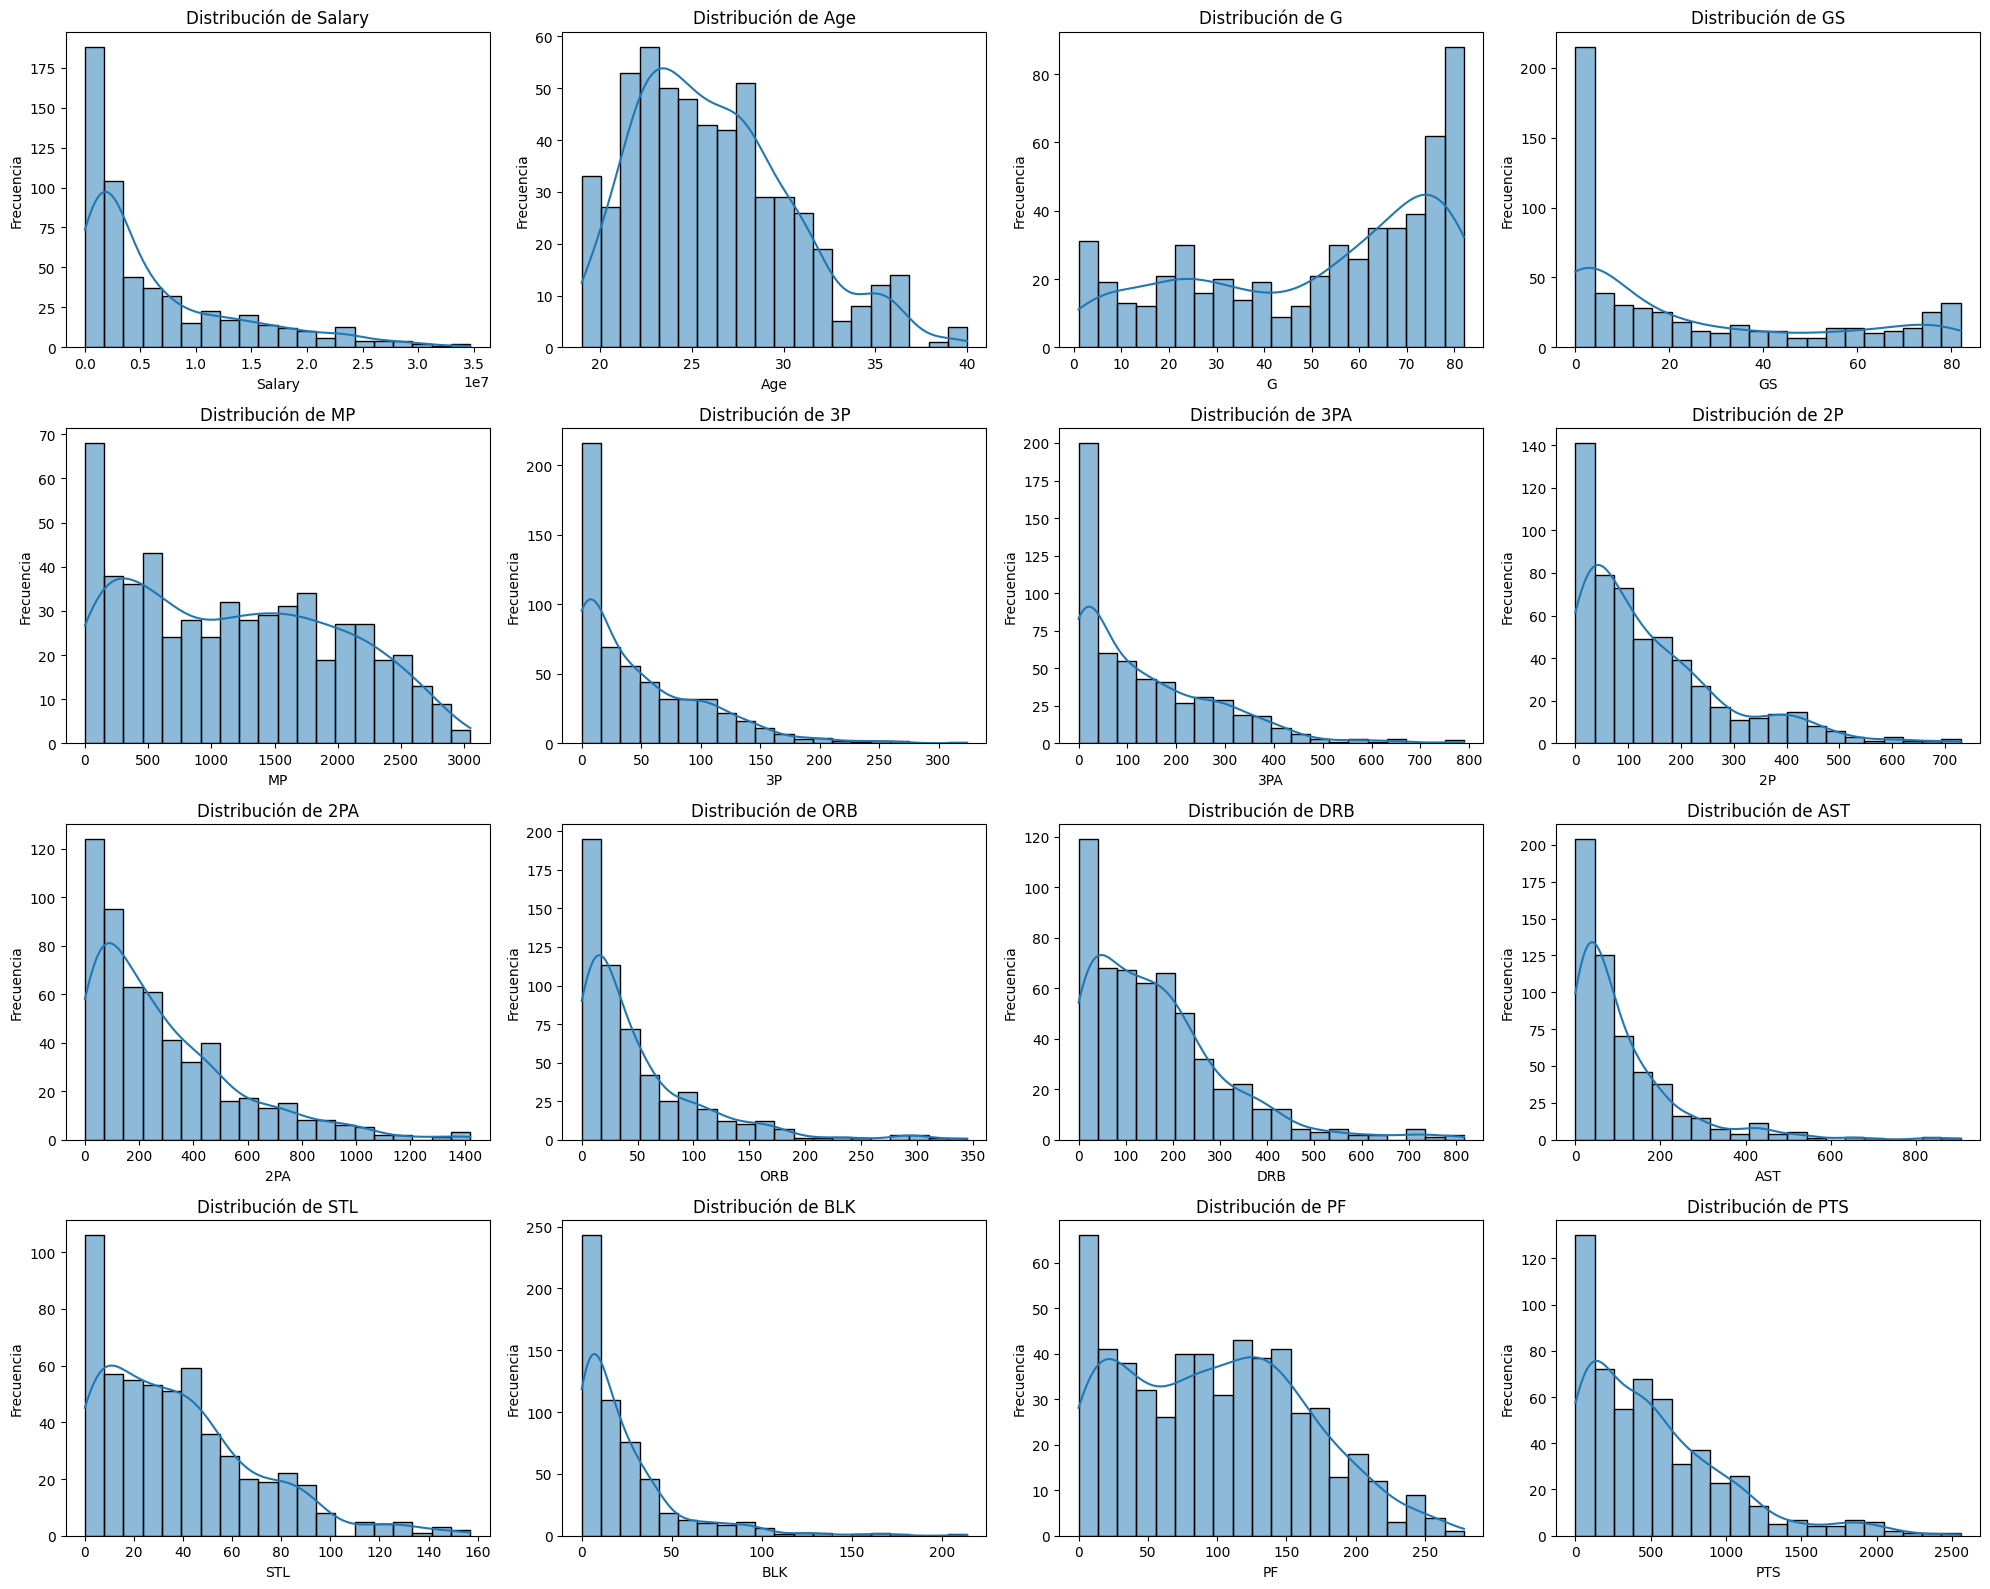

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Salary', 'Age', 'G', 'GS', 'MP', '3P', '3PA', '2P', '2PA',
                  'ORB', 'DRB', 'AST', 'STL', 'BLK', 'PF', 'PTS']

# Tamaño de la figura general
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))  # 4x4 cuadrícula

# Aplanamos los ejes para iterar fácilmente
axes = axes.flatten()

# Crear cada subplot
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Eliminar ejes no usados si hay menos columnas que subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



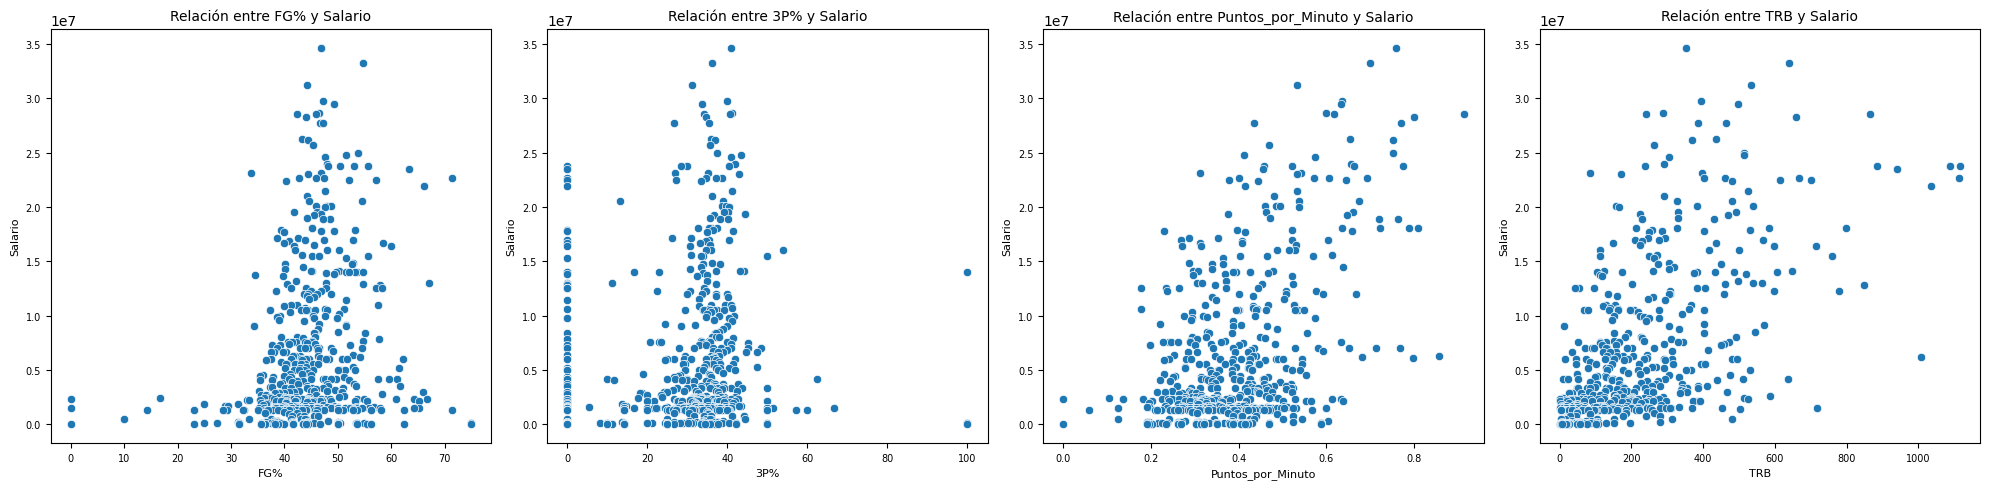


Primeras filas del DataFrame con las nuevas características:
           Player Team      Salary    Year   Age Pos     G    GS      MP  \
0   Stephen Curry  GSW  34682550.0  2017.0  28.0  PG  79.0  79.0  2638.0   
1    LeBron James  CLE  33285709.0  2017.0  32.0  SF  74.0  74.0  2794.0   
2    Paul Millsap  DEN  31269231.0  2017.0  31.0  PF  69.0  67.0  2343.0   
3  Gordon Hayward  BOS  29727900.0  2017.0  26.0  SF  73.0  73.0  2516.0   
4   Blake Griffin  DET  29512900.0  2017.0  27.0  PF  61.0  61.0  2076.0   

      3P  ...    AST    STL   BLK     PF     PTS        FG%        3P%  \
0  324.0  ...  523.0  143.0  17.0  183.0  1999.0  46.777547  41.064639   
1  124.0  ...  646.0   92.0  44.0  134.0  1954.0  54.761905  36.257310   
2   75.0  ...  252.0   90.0  62.0  186.0  1246.0  44.238683  31.120332   
3  149.0  ...  252.0   73.0  20.0  117.0  1601.0  47.145329  39.839572   
4   38.0  ...  300.0   58.0  23.0  157.0  1316.0  49.330587  33.628319   

         2P%  Puntos_por_Minuto    T

In [ ]:
# 5. Ingeniería de Características

# 5. Ingeniería de Características (con manejo de división por cero)
df['FG%'] = np.where((df['2PA'] + df['3PA']) > 0, ((df['2P'] + df['3P']) / (df['2PA'] + df['3PA'])) * 100, 0)
df['3P%'] = np.where(df['3PA'] > 0, (df['3P'] / df['3PA']) * 100, 0)
df['2P%'] = np.where(df['2PA'] > 0, (df['2P'] / df['2PA']) * 100, 0)
df['Puntos_por_Minuto'] = np.where(df['MP'] > 0, df['PTS'] / df['MP'], 0)
df['TRB'] = df['ORB'] + df['DRB']

new_features = ['FG%', '3P%', 'Puntos_por_Minuto', 'TRB']


plt.figure(figsize=(20, 5))  # Ajusta el tamaño total de la figura para 4 subplots

for i, col in enumerate(new_features):
    plt.subplot(1, 4, i + 1)  # 1 fila, 4 columnas, subplot i+1
    sns.scatterplot(x=df[col], y=df['Salary'])
    plt.title(f'Relación entre {col} y Salario', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Salario', fontsize=8)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.tight_layout()

plt.show()

print("\nPrimeras filas del DataFrame con las nuevas características:")
print(df.head())

In [ ]:
print("\nCorrelación de nuevas características con el Salario:")
print(df[['FG%', '3P%', '2P%', 'Puntos_por_Minuto', 'Salary']].corr()['Salary'].sort_values(ascending=False))



Correlación de nuevas características con el Salario:
Salary               1.000000
Puntos_por_Minuto    0.485795
FG%                  0.199275
2P%                  0.108074
3P%                  0.062822
Name: Salary, dtype: float64

Estadísticas descriptivas de nuevas características por Posición:
            FG%        3P%        2P%  Puntos_por_Minuto        Salary
Pos                                                                   
C     51.385380  12.901073  52.782335           0.403540  8.080497e+06
PF    44.770882  30.302363  50.082679           0.393993  6.601501e+06
PF-C  44.047619  33.673469  48.319328           0.382653  1.524305e+06
PG    42.331339  33.476474  46.024272           0.407203  5.567825e+06
SF    43.222331  32.356768  50.569635           0.379394  6.590565e+06
SG    42.528887  34.600903  47.117098           0.399659  5.779589e+06

Mediana de nuevas características por Posición:
            FG%        3P%        2P%  Puntos_por_Minuto     Salary
Pos           

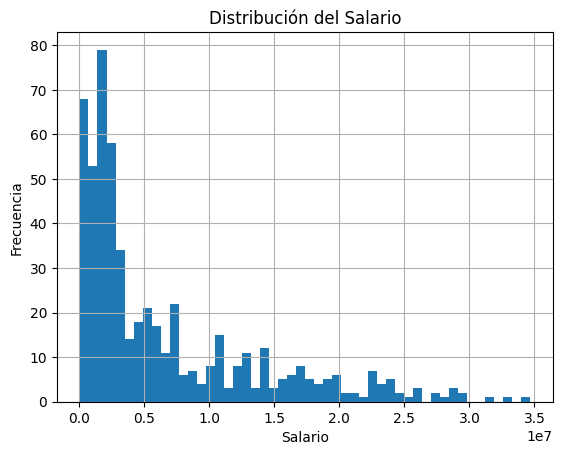

In [ ]:
import matplotlib.pyplot as plt

# Asumiendo que 'df' es tu DataFrame y tiene una columna llamada 'Salary'

df['Salary'].hist(bins=50)  # 'bins' controla el número de barras en el histograma
plt.title('Distribución del Salario')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()

## **3. Desarrollo modelo KMeans**

In [178]:
df = pd.read_csv('nba_data.csv')

In [179]:
df

,Player,Team,Salary,Year,Age,Pos,G,GS,MP,3P,3PA,2P,2PA,ORB,DRB,AST,STL,BLK,PF,PTS
0,Stephen Curry,GSW,34682550.0,2017.0,28.0,PG,79.0,79.0,2638.0,324.0,789.0,351.0,654.0,61.0,292.0,523.0,143.0,17.0,183.0,1999.0
1,LeBron James,CLE,33285709.0,2017.0,32.0,SF,74.0,74.0,2794.0,124.0,342.0,612.0,1002.0,97.0,543.0,646.0,92.0,44.0,134.0,1954.0
2,Paul Millsap,DEN,31269231.0,2017.0,31.0,PF,69.0,67.0,2343.0,75.0,241.0,355.0,731.0,111.0,422.0,252.0,90.0,62.0,186.0,1246.0
3,Gordon Hayward,BOS,29727900.0,2017.0,26.0,SF,73.0,73.0,2516.0,149.0,374.0,396.0,782.0,49.0,344.0,252.0,73.0,20.0,117.0,1601.0
4,Blake Griffin,DET,29512900.0,2017.0,27.0,PF,61.0,61.0,2076.0,38.0,113.0,441.0,858.0,111.0,385.0,300.0,58.0,23.0,157.0,1316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,Quinn Cook,NOP,25000.0,2017.0,23.0,PG,9.0,0.0,111.0,6.0,12.0,16.0,29.0,1.0,3.0,14.0,3.0,0.0,7.0,52.0
679,Chris Johnson,HOU,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,Beno Udrih,DET,25000.0,2017.0,34.0,PG,39.0,0.0,560.0,11.0,32.0,81.0,165.0,6.0,51.0,131.0,13.0,0.0,29.0,227.0
681,Joel Bolomboy,MIL,22248.0,2017.0,23.0,PF,12.0,0.0,53.0,1.0,4.0,8.0,12.0,4.0,13.0,2.0,1.0,2.0,1.0,22.0


In [180]:
# Calcular 'Puntos_por_Minuto'
df.drop(df[df['MP'] == 0].index, inplace=True)
# Usamos np.where para evitar la división por cero si 'MP' (Minutos Jugados) es 0
#df['Puntos_por_Minuto'] = np.where(df['MP'] > 0, df['PTS'] / df['MP'], 0)

# Calcular 'TRB' (Rebotes Totales) sumando 'ORB' (Rebotes Ofensivos) y 'DRB' (Rebotes Defensivos)
df['TRB'] = df['ORB'] + df['DRB']

# Calcular el porcentaje de tiros de 2 puntos
df['%2P'] = (df['2P'] / df['2PA']) * 100

# Calcular el porcentaje de tiros de 3 puntos
df['%3P'] = (df['3P'] / df['3PA']) * 100

# Mostrar las primeras filas del DataFrame con las nuevas características
print(df.head())

# Mostrar información del DataFrame para ver los tipos de las nuevas columnas
print(df.info())

           Player Team      Salary    Year   Age Pos     G    GS      MP  \
0   Stephen Curry  GSW  34682550.0  2017.0  28.0  PG  79.0  79.0  2638.0   
1    LeBron James  CLE  33285709.0  2017.0  32.0  SF  74.0  74.0  2794.0   
2    Paul Millsap  DEN  31269231.0  2017.0  31.0  PF  69.0  67.0  2343.0   
3  Gordon Hayward  BOS  29727900.0  2017.0  26.0  SF  73.0  73.0  2516.0   
4   Blake Griffin  DET  29512900.0  2017.0  27.0  PF  61.0  61.0  2076.0   

      3P    3PA     2P     2PA    ORB    DRB    AST    STL   BLK     PF  \
0  324.0  789.0  351.0   654.0   61.0  292.0  523.0  143.0  17.0  183.0   
1  124.0  342.0  612.0  1002.0   97.0  543.0  646.0   92.0  44.0  134.0   
2   75.0  241.0  355.0   731.0  111.0  422.0  252.0   90.0  62.0  186.0   
3  149.0  374.0  396.0   782.0   49.0  344.0  252.0   73.0  20.0  117.0   
4   38.0  113.0  441.0   858.0  111.0  385.0  300.0   58.0  23.0  157.0   

      PTS    TRB        %2P        %3P  
0  1999.0  353.0  53.669725  41.064639  
1  1954.0 

In [181]:
df = df.drop('Year', axis=1)

In [182]:
# Eliminar las filas que contienen al menos un valor faltante
df_cleaned = df.dropna()

# Verificar el nuevo tamaño del DataFrame y los valores no nulos
print("Tamaño del DataFrame original:", df.shape)
print("Tamaño del DataFrame después de eliminar valores faltantes:", df_cleaned.shape)
print("\nConteo de valores no nulos en el DataFrame limpio:")

# Eliminar la columna 'Salary'
df_cleaned = df_cleaned.drop(columns=['Salary'])

# Eliminar las filas con jugadores duplicados, conservando la primera ocurrencia
df_cleaned = df_cleaned.drop_duplicates(subset=['Player'], keep='first')

# Resetear el índice
df = df_cleaned.reset_index(drop=True)
df.info()

Tamaño del DataFrame original: (683, 22)
Tamaño del DataFrame después de eliminar valores faltantes: (517, 22)

Conteo de valores no nulos en el DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  384 non-null    object 
 1   Team    384 non-null    object 
 2   Age     384 non-null    float64
 3   Pos     384 non-null    object 
 4   G       384 non-null    float64
 5   GS      384 non-null    float64
 6   MP      384 non-null    float64
 7   3P      384 non-null    float64
 8   3PA     384 non-null    float64
 9   2P      384 non-null    float64
 10  2PA     384 non-null    float64
 11  ORB     384 non-null    float64
 12  DRB     384 non-null    float64
 13  AST     384 non-null    float64
 14  STL     384 non-null    float64
 15  BLK     384 non-null    float64
 16  PF      384 non-null    float64
 17  PTS     384 non-null    

In [183]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import ipywidgets as widgets
from IPython.display import display, clear_output
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.decomposition import PCA

In [184]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=2)
good_columns = df._get_numeric_data().dropna(axis=1)
kmeans_model.fit(good_columns)
labels = kmeans_model.labels_
labels

array([2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 4, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 3, 0, 4, 4, 2, 0, 4, 0, 0, 0, 0, 4, 4, 0, 0,
       2, 0, 4, 3, 4, 4, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3,
       0, 4, 4, 0, 0, 0, 0, 3, 2, 3, 0, 0, 0, 3, 4, 4, 0, 1, 4, 4, 4, 3,
       0, 4, 4, 0, 3, 0, 4, 3, 0, 3, 4, 4, 0, 4, 3, 1, 4, 0, 4, 3, 4, 0,
       4, 4, 4, 3, 4, 0, 3, 2, 1, 4, 0, 4, 4, 0, 4, 3, 0, 4, 4, 3, 4, 3,
       4, 2, 2, 3, 3, 1, 4, 3, 3, 0, 0, 3, 3, 4, 0, 4, 0, 4, 4, 3, 3, 4,
       4, 1, 0, 4, 3, 3, 1, 3, 4, 1, 4, 0, 0, 1, 3, 3, 4, 3, 1, 0, 3, 3,
       3, 3, 3, 3, 0, 4, 4, 4, 3, 3, 3, 3, 4, 4, 0, 4, 4, 3, 3, 3, 4, 4,
       0, 3, 4, 4, 4, 3, 1, 3, 4, 4, 1, 1, 3, 1, 0, 4, 4, 3, 1, 4, 3, 1,
       1, 3, 0, 3, 4, 1, 4, 4, 1, 3, 1, 3, 1, 3, 1, 1, 2, 1, 4, 4, 1, 3,
       3, 4, 0, 4, 3, 3, 3, 4, 4, 1, 4, 3, 4, 3, 3, 1, 1, 4, 1, 3, 1, 1,
       1, 1, 3, 1, 3, 3, 1, 3, 4, 3, 3, 1, 3, 4, 1,


Medias de las estadísticas por cluster:
               Age          G         GS           MP          3P         3PA  \
Cluster                                                                         
0        26.658537  75.000000  59.609756  2262.439024   87.207317  243.524390   
1        24.833333  28.083333   3.250000   339.285714   10.738095   33.178571   
2        25.821429  76.785714  76.714286  2693.678571  153.107143  407.750000   
3        26.305263  61.442105  13.642105  1065.610526   37.673684  108.473684   
4        27.084211  70.073684  32.252632  1688.810526   74.905263  206.768421   

                 2P         2PA         ORB         DRB         AST  \
Cluster                                                               
0        290.621951  566.634146  107.060976  337.487805  205.902439   
1         33.821429   71.023810   13.702381   42.428571   26.488095   
2        499.928571  990.285714   86.250000  368.321429  387.821429   
3        110.663158  221.094737   46

<Figure size 1200x800 with 0 Axes>

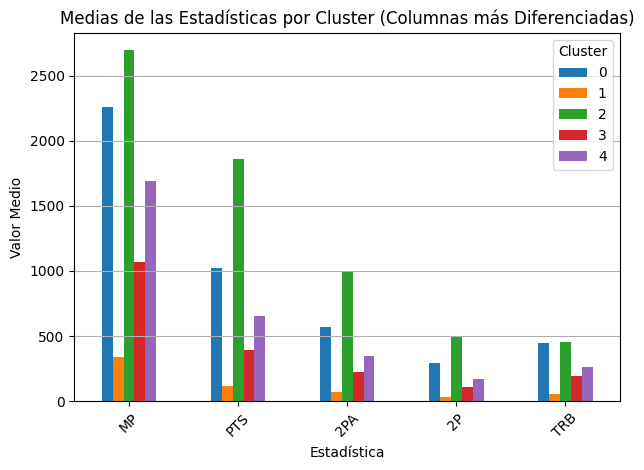

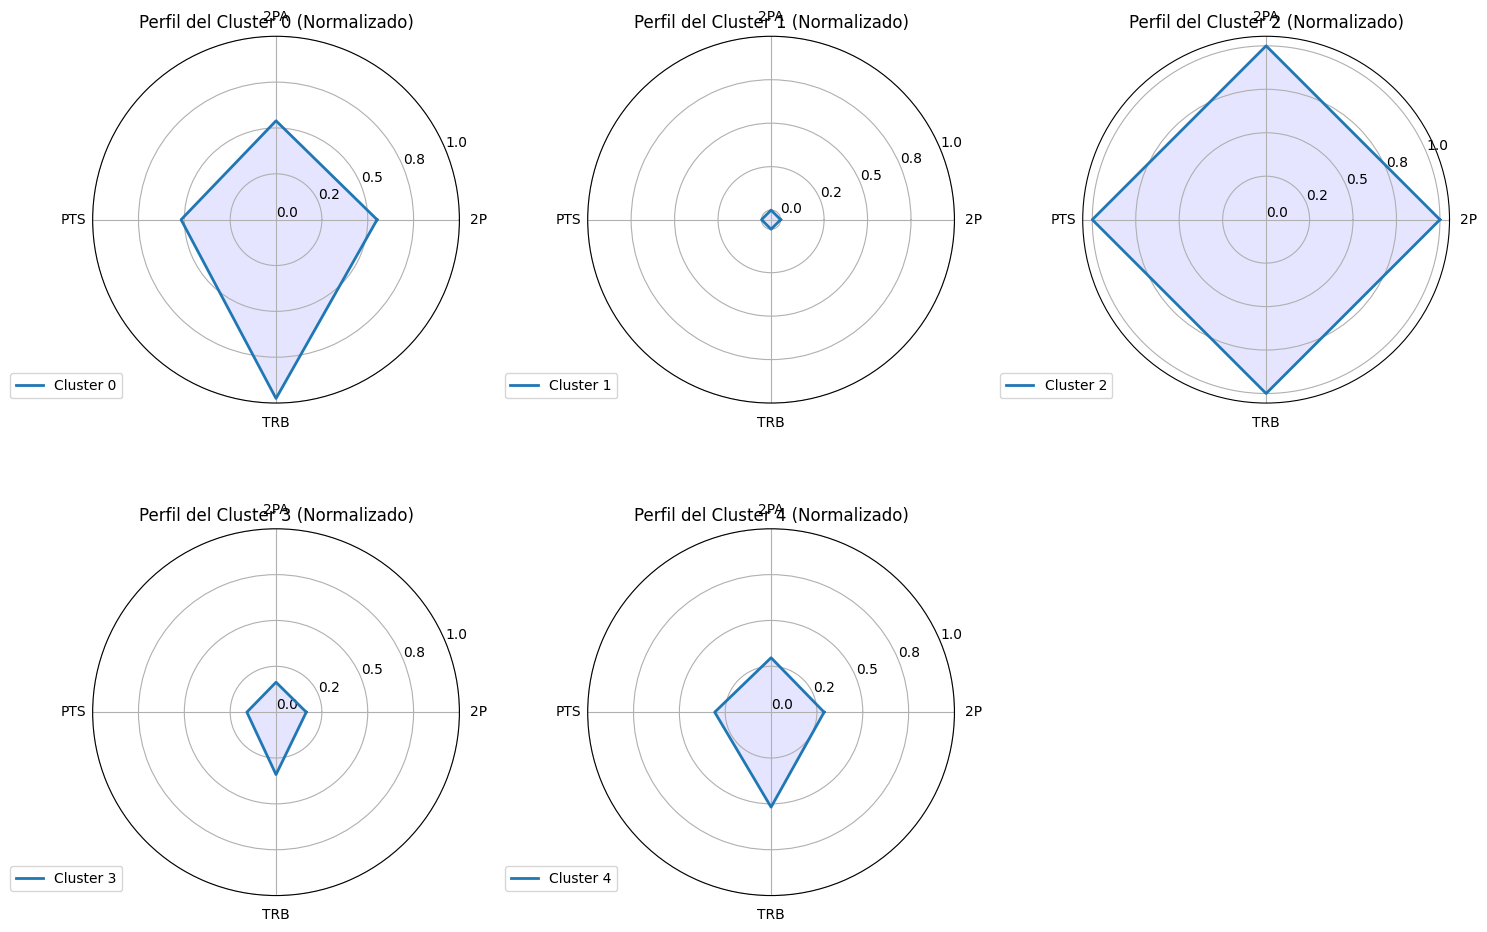

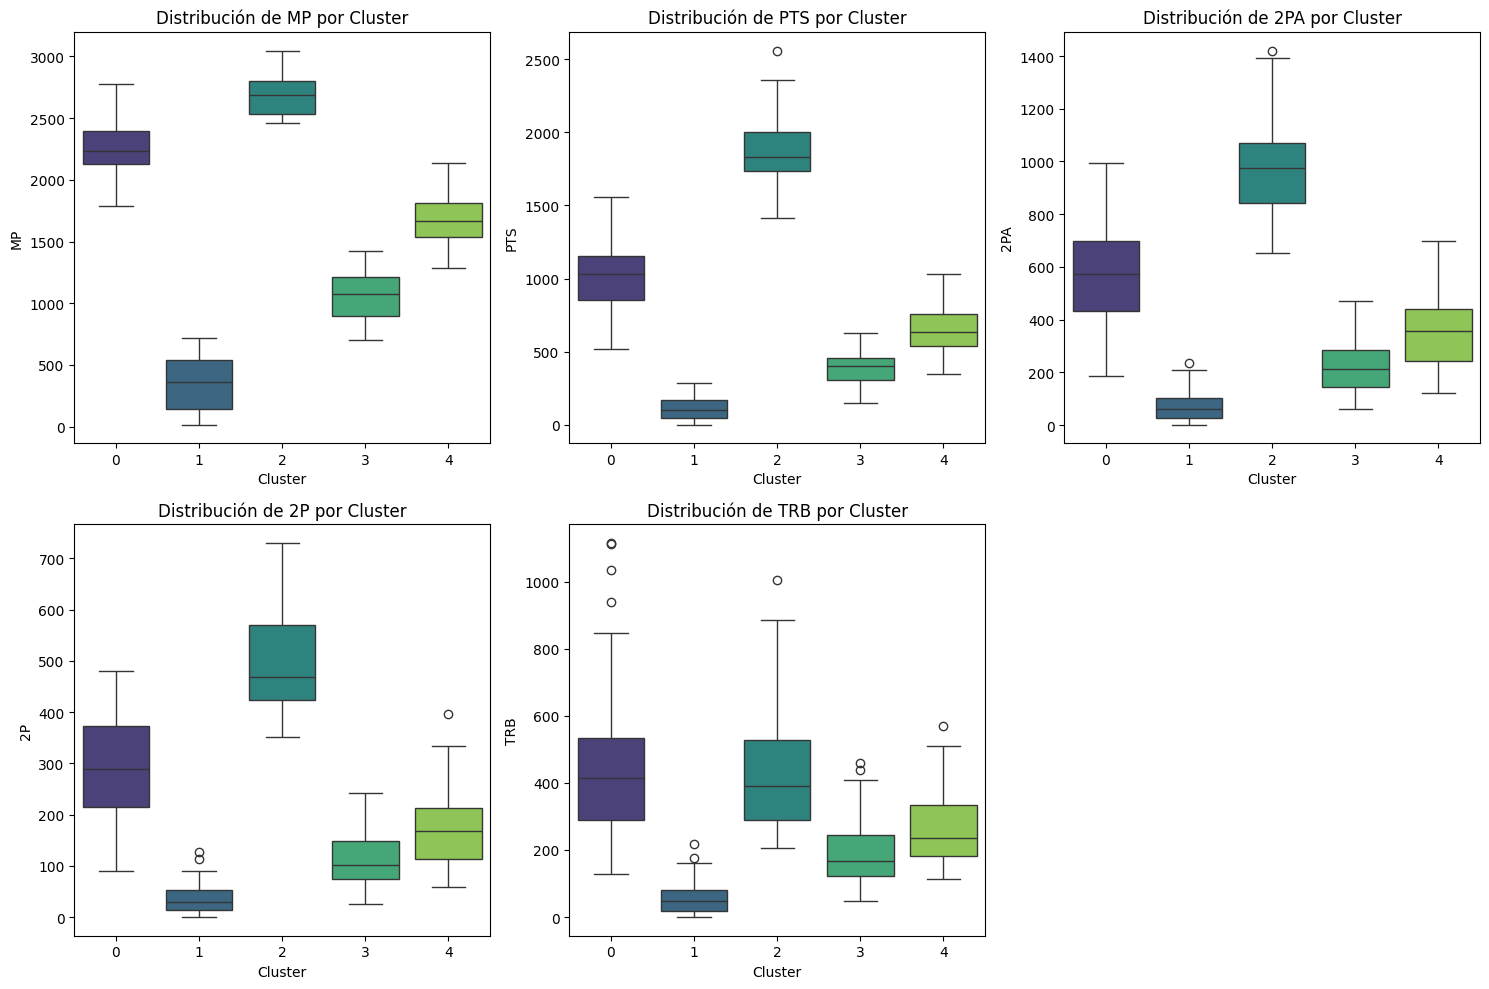

In [185]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

# Asumiendo que 'df_clustered' y 'cluster_means' ya están definidos
n_clusters = 5
# Añadir las etiquetas de los clusters al DataFrame
df_clustered = df.copy()
df_clustered['Cluster'] = labels

# Calcular las medias por cluster
cluster_means = df_clustered.groupby('Cluster')[good_columns.columns].mean()

# Imprimir las medias
print("\nMedias de las estadísticas por cluster:")
print(cluster_means)

n_clusters = len(cluster_means)
good_columns = cluster_means.columns

# 1. Calcular la varianza de cada columna entre los clusters
cluster_variance = cluster_means.var()

# 2. Ordenar las columnas por varianza descendente
most_varying_columns = cluster_variance.sort_values(ascending=False).index

# 3. Seleccionar un número de columnas a visualizar (por ejemplo, las 5 más diferenciadas)
n_cols_to_visualize = min(5, len(most_varying_columns))
selected_columns = most_varying_columns[:n_cols_to_visualize]

print("\nLas columnas que más se diferencian entre los clusters:")
print(selected_columns)

# --- Visualización de las Medias de los Clusters (Gráfico de Barras Múltiples) ---
cluster_means_selected = cluster_means[selected_columns]
cluster_means_transposed_selected = cluster_means_selected.T

plt.figure(figsize=(12, 8))
cluster_means_transposed_selected.plot(kind='bar')
plt.title('Medias de las Estadísticas por Cluster (Columnas más Diferenciadas)')
plt.xlabel('Estadística')
plt.ylabel('Valor Medio')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

from sklearn.preprocessing import MinMaxScaler

# ... (tu código anterior hasta la obtención de cluster_means) ...

# Normalizar las medias de los clusters
scaler = MinMaxScaler()
cluster_means_scaled = pd.DataFrame(scaler.fit_transform(cluster_means), columns=cluster_means.columns, index=cluster_means.index)

# --- Visualización de las Medias de los Clusters (Gráfico de Radar) con datos normalizados ---
categories_radar = [col for col in list(cluster_means_scaled.columns) if col != 'MP' and col in selected_columns]
n_categories_radar = len(categories_radar)

fig_radar, axes_radar = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), subplot_kw={'polar': True})
axes_radar = axes_radar.flatten()

for i in range(n_clusters):
    values_radar = cluster_means_scaled.drop('MP', axis=1)[categories_radar].iloc[i].values.flatten().tolist()
    if values_radar:
        values_radar += values_radar[:1]
        angles_radar = [n / float(n_categories_radar) * 2 * pi for n in range(n_categories_radar)]
        angles_radar += angles_radar[:1]

        ax_radar = axes_radar[i]
        ax_radar.plot(angles_radar, values_radar, linewidth=2, linestyle='solid', label=f'Cluster {i}')
        ax_radar.fill(angles_radar, values_radar, 'b', alpha=0.1)
        ax_radar.set_xticks(angles_radar[:-1])
        ax_radar.set_xticklabels(categories_radar)
        ax_radar.set_yticks(np.linspace(0, 1, 5)) # Añadir algunas marcas en la escala normalizada
        ax_radar.set_yticklabels([f'{y:.1f}' for y in np.linspace(0, 1, 5)])
        ax_radar.set_title(f'Perfil del Cluster {i} (Normalizado)')
        ax_radar.grid(True)
        ax_radar.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    else:
        fig_radar.delaxes(axes_radar[i])

if n_clusters < 6:
    for j in range(n_clusters, 6):
        if fig_radar.axes[j]:
            fig_radar.delaxes(fig_radar.axes[j])

plt.tight_layout()
plt.show()

# --- Visualización de la Distribución de Cada Variable por Cluster (Box Plots) ---
num_cols_boxplot = len(selected_columns)
num_rows_boxplot = (num_cols_boxplot + 2) // 3

plt.figure(figsize=(15, 5 * num_rows_boxplot))
for i, column in enumerate(selected_columns):
    plt.subplot(num_rows_boxplot, 3, i + 1)
    sns.boxplot(x='Cluster', y=column, data=df_clustered, palette='viridis')
    plt.title(f'Distribución de {column} por Cluster')
plt.tight_layout()
plt.show()

In [186]:
good_columns

Index(['Age', 'G', 'GS', 'MP', '3P', '3PA', '2P', '2PA', 'ORB', 'DRB', 'AST',
       'STL', 'BLK', 'PF', 'PTS', 'TRB', '%2P', '%3P'],
      dtype='object')

In [187]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np


# Ejemplo de datos de un nuevo jugador (reemplaza con la entrada del usuario)
nuevo_jugador_data = {
    'MP': [2000],
    'PTS': [1000],
    '2PA': [400],
    '2P': [200],
    'TRB': [200],
    'Age': [26],
    'G': [60],
    'GS': [30],
    '3P': [50],
    '3PA': [150],
    'ORB': [30],
    'DRB': [70],
    'AST': [80],
    'STL': [40],
    'BLK': [20],
    'PF': [120],
    '%2P': [0.50],
    '%3P': [0.33]
}

nuevo_jugador = pd.DataFrame(nuevo_jugador_data, index=[0])

# Asegúrate de seleccionar solo las columnas utilizadas para entrenar el modelo
nuevo_jugador_stats = nuevo_jugador[good_columns]

# Predecir el cluster
cluster_predicho = kmeans_model.predict(nuevo_jugador_stats)

print(f"\nEl jugador pertenece al Clúster: {cluster_predicho[0]}")


# (Opcional) Obtener el nombre del rol asociado a este cluster
def obtener_nombre_rol(cluster_id):
    if cluster_id == 0:
        return "Estrella"
    elif cluster_id == 1:
        return "Fondo de Banquillo"
    elif cluster_id == 2:
        return "Jugador Franquicia"
    elif cluster_id == 3:
        return "Rotación"
    elif cluster_id == 4:
        return "Sexto Hombre"
    else:
        return "Rol Desconocido"

nombre_rol = obtener_nombre_rol(cluster_predicho[0])
print(f"Rol Potencial: {nombre_rol}")


El jugador pertenece al Clúster: 4
Rol Potencial: Sexto Hombre


In [188]:
# --- Añadir la columna 'Cluster' al DataFrame ---
df['Cluster'] = labels

def obtener_jugadores_por_cluster(df, numero_cluster):
    """
    Obtiene los nombres de los jugadores que pertenecen a un cluster específico.

    Args:
        df (pd.DataFrame): DataFrame con la información de los jugadores
                           y una columna 'Cluster' con la asignación del cluster.
        numero_cluster (int): El número del cluster del que se quieren obtener los jugadores.

    Returns:
        list: Una lista con los nombres de los jugadores pertenecientes al cluster especificado.
              Retorna una lista vacía si no hay jugadores en ese cluster.
    """
    jugadores_en_cluster = df[df['Cluster'] == numero_cluster]['Player'].tolist()
    return jugadores_en_cluster

# Ejemplo de cómo usar la función para el Clúster 0
cluster_a_buscar = 0
jugadores_cluster_0 = obtener_jugadores_por_cluster(df, cluster_a_buscar)

if jugadores_cluster_0:
    print(f"Jugadores pertenecientes al Clúster {cluster_a_buscar}:")
    for jugador in jugadores_cluster_0:
        print(f"- {jugador}")
else:
    print(f"No se encontraron jugadores en el Clúster {cluster_a_buscar}.")

# Puedes repetir esto para otros números de cluster (1, 2, etc.)

Jugadores pertenecientes al Clúster 0:
- Paul Millsap
- Blake Griffin
- Kyle Lowry
- Mike Conley
- Al Horford
- Jrue Holiday
- Kevin Durant
- Otto Porter
- Chris Paul
- Andre Drummond
- Dwight Howard
- J.J. Redick
- Kevin Love
- Brook Lopez
- DeAndre Jordan
- Steven Adams
- Nicolas Batum
- Rudy Gobert
- LaMarcus Aldridge
- Victor Oladipo
- Danilo Gallinari
- Serge Ibaka
- Ryan Anderson
- Allen Crabbe
- Jeff Teague
- Greg Monroe
- Wesley Matthews
- Kentavious Caldwell-Pope
- Evan Fournier
- Robert Covington
- Tim Hardaway
- Draymond Green
- Tristan Thompson
- Tobias Harris
- Dwyane Wade
- Jonas Valanciunas
- Thaddeus Young
- Eric Bledsoe
- Ricky Rubio
- Gorgui Dieng
- Mason Plumlee
- Taj Gibson
- James Johnson
- Robin Lopez
- Marvin Williams
- Michael Kidd-Gilchrist
- Eric Gordon
- Marcin Gortat
- Zach Randolph
- Nikola Vucevic
- Solomon Hill
- Wilson Chandler
- Austin Rivers
- Courtney Lee
- Jordan Clarkson
- Jamal Crawford
- Bojan Bogdanovic
- Maurice Harkless
- Darren Collison
- Tony